![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Natural Language Processing - Lecture 1</a>

## Final Project: K Nearest Neighbors Model for the IMDB Movie Review Dataset

For the final project, build a K Nearest Neighbors model to predict the sentiment (positive or negative) of movie reviews. The dataset is originally hosted here: http://ai.stanford.edu/~amaas/data/sentiment/

Use the notebooks from the class and implement the model, train and test with the corresponding datasets.

You can follow these steps:
1. Read training-test data (Given)
2. Train a KNN classifier (Implement)
3. Make predictions on your test dataset (Implement)

__You can use the KNN Classifier from here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html__

## 1. Reading the dataset

We will use the __pandas__ library to read our dataset. 

#### __Training data:__
Let's read our training data. Here, we have the text and label fields. Labe is 1 for positive reviews and 0 for negative reviews.

In [1]:
#Upgrade dependencies
!pip install --upgrade pip
!pip install --upgrade scikit-learn

In [2]:
import pandas as pd

train_df = pd.read_csv('../data/final_project/imdb_train.csv', header=0)
train_df.head()

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0


#### __Test data:__

In [3]:
import pandas as pd

test_df = pd.read_csv('../data/final_project/imdb_test.csv', header=0)
test_df.head()

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


#### __Data Preprocessing:__

In [4]:
train_df.isna().sum()

text     0
label    0
dtype: int64

In [5]:
train_df.duplicated().sum()

96

In [6]:
train_df.shape

(25000, 2)

In [7]:
train_df.drop_duplicates(inplace = True)

In [8]:
test_df.duplicated().sum()

199

In [9]:
test_df.drop_duplicates(inplace = True)

In [10]:
test_df.shape

(24801, 2)

In [11]:
# Importing the necessary functions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
import re,string
# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')

# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# New stop word list
stop_words = [word for word in stop if word not in excluding]

def process_text(texts): 
    
    final_text_list=[]
    for sent in texts:
        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ""

        lemmatized_sentence = []

        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        tokenizer = WordPunctTokenizer()
        for w in tokenizer.tokenize(sent):
            # We are applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words) and (w):  
                #ntlk only deal with one word
                word_pos_tags = nltk.tag.pos_tag(tokenizer.tokenize(w))
                for idx, tag in enumerate(word_pos_tags):
                    lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))
        final_string = " ".join(lemmatized_sentence)
        final_string = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', final_string)
        final_string = re.sub('\s+', ' ', final_string) # Remove extra space and tabs
        final_text_list.append(final_string)
    return final_text_list

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(train_df[["text"]],
                                                  train_df["label"],
                                                  test_size=0.10,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

In [13]:
print("Processing the reviewText fields")
train_text_list = process_text(X_train["text"].tolist())
val_text_list = process_text(X_val["text"].tolist())

Processing the reviewText fields


## 2. Train a KNN Classifier
Here, you will apply pre-processing operations we covered in the class. Then, you can split your dataset to training and validation here. For your first submission, you will use __K Nearest Neighbors Classifier__. It is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [59]:
# Implement this
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

### PIPELINE ###
##########################

pipeline = Pipeline([
    ('text_vect', TfidfVectorizer(max_features =100)),
    ('knn', KNeighborsClassifier())  
                                ])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
#from sklearn import set_config
#set_config(display='diagram')
pipeline

Pipeline(memory=None,
         steps=[('text_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=100,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=No

In [60]:
# We using lists of processed text fields 
X_train = train_text_list
X_val = val_text_list

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train.values)

Pipeline(memory=None,
         steps=[('text_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=100,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=No

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted pipeline to make predictions on the validation dataset
val_predictions = pipeline.predict(X_val)
print(confusion_matrix(y_val.values, val_predictions))
print(classification_report(y_val.values, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val.values, val_predictions))

[[835 397]
 [376 883]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1232
           1       0.69      0.70      0.70      1259

    accuracy                           0.69      2491
   macro avg       0.69      0.69      0.69      2491
weighted avg       0.69      0.69      0.69      2491

Accuracy (validation): 0.6896828582898434


### Use the GridSearchCV to try different value

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
import numpy as np
def do_grid_search_KNN(X_train, y_train, X_val, y_val):
    X_train_val = np.concatenate((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))


    param_grid = [{'knn__n_neighbors':np.arange(1,11,1),}]

    pipeline = Pipeline([
    ('text_vect', TfidfVectorizer(max_features =100)),
    ('knn', KNeighborsClassifier())  
                                ])
    grid = GridSearchCV(pipeline,
                        param_grid,
                        return_train_score=True,
                        cv = 5,
                        refit = True,
                        scoring = 'f1')
    grid.fit(X_train_val, y_train_val)
    df = pd.DataFrame(grid.cv_results_)
    return df

In [95]:
score_K = do_grid_search_KNN(train_text_list, y_train, val_text_list, y_val)

In [99]:
cols_to_keep = [ "mean_test_score","mean_train_score"]
df = score_K[cols_to_keep]
df.index = score_K["param_knn__n_neighbors"]

,mean_test_score,mean_train_score
param_knn__n_neighbors,,
1,0.631537,1.000000
2,0.532981,0.774109
3,0.663522,0.832641
4,0.607181,0.758823
5,0.679862,0.795148
6,0.641886,0.751583
7,0.691683,0.780395
8,0.661788,0.750355
9,0.698407,0.772075


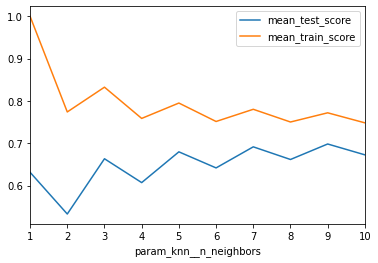

In [102]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

Accroding to the figure, we find the fit modle can be relatively stable when K = 9, so we decided to chocie k = 9.

## 3. Make predictions on your test dataset

Once we select our best performing model, we can use it to make predictions on the test dataset. You can simply use __.fit()__ function with your training data to use the best performing K value and use __.predict()__ with your test data to get your test predictions.

In [103]:
# Implement this

### PIPELINE1 ###
##########################
pipeline1 = Pipeline([
    ('text_vect', TfidfVectorizer(max_features =100)),
    ('knn', KNeighborsClassifier(n_neighbors = 9))  
                                ])
pipeline1.fit(X_train, y_train.values)

Pipeline(memory=None,
         steps=[('text_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=100,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=No

In [104]:
test_text_list = process_text(test_df["text"].tolist())
y_test = test_df["label"]
test_predictions = pipeline1.predict(test_text_list)
print(confusion_matrix(y_test.values, test_predictions))
print(classification_report(y_test.values, test_predictions))
print("Accuracy (test):", accuracy_score(y_test.values, test_predictions))

[[8537 3824]
 [3735 8705]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     12361
           1       0.69      0.70      0.70     12440

    accuracy                           0.70     24801
   macro avg       0.70      0.70      0.70     24801
weighted avg       0.70      0.70      0.70     24801

Accuracy (test): 0.6952139026652151
